In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [181]:
def get_speed(depth):
    G = 6.67E-11 # SI
    M = 1.0E30 # kg
    R = 7.0E8 # meters
    gamma = 1.66
    rho = M/((np.pi*4.0/3.0) * R**3)
    v = np.sqrt(gamma*2.0*np.pi/3.0 * G * rho * (R**2 - (R-depth)**2.0))
    return v

In [80]:
def get_new_sin_theta(x, y, delta_y, sin_theta):
    speed_ratio = get_speed(y+delta_y)/get_speed(y)
    new_sin_theta = sin_theta * speed_ratio
    return new_sin_theta

In [186]:
def propagate(sin_theta_init=0.0, delta_y=1E4, n_max=1000):
    n_iteration = 0
    x = [1E-3] 
    y = [delta_y]
    t = [0.0]
    old_sin_theta = sin_theta_init
    while (old_sin_theta < 0.999) and n_iteration<n_max and y[-1] < 7.0E8:
        v = get_speed(y[-1]+delta_y)
        #print(v)
        new_sin_theta = get_new_sin_theta(x[-1], y[-1], delta_y, old_sin_theta)
        #print(new_sin_theta)
        y.append(y[-1] + delta_y)
        delta_x = delta_y * new_sin_theta/np.sqrt(1.0 - new_sin_theta**2)
        x.append(x[-1] + delta_x)
        delta_l = np.sqrt(delta_x**2 + delta_y**2)
        t.append(t[-1] + delta_l/v)
        
        old_sin_theta = new_sin_theta
        n_iteration += 1
    return x, y, t

1.5158963858914078
15.382746435094464
25.674989581231102
33.65543980336484
40.06877968493831
45.343875721282636
49.759108294164136
53.48302132821906
56.674290666462106
59.44943727516373
61.863485422077645
63.99692247976889
65.91182634040847
67.58364236497118
69.06555687409227
70.43548580282541
71.6693279013966
72.74526547047411
73.748651294481
74.67846189534852
75.51683586883038
76.30250859815602
77.01315027570325
77.63879960728609
78.25809793018563
78.80375640067126
79.33394079326898
79.83486625199346
80.29898174830132
80.68542649062167
81.11346898524936
81.47194419295616
81.80910595842889
82.13786960867735
82.43381831310734
82.71465867070144
83.00122897678811
83.27422522496924
83.51776974368211
83.71617300127335


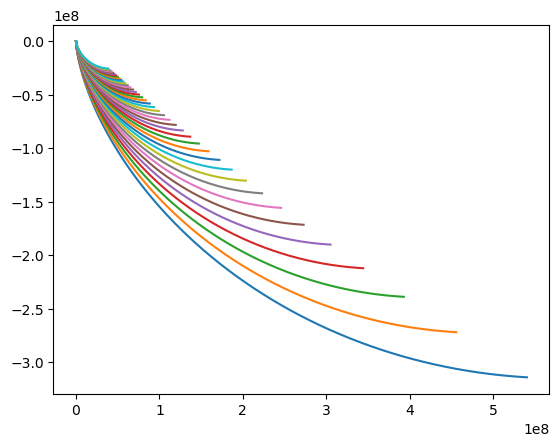

In [202]:
n_theta = 40
sin_theta_init_values = np.linspace(0.0064, 0.0200, n_theta)
time = np.zeros(n_theta)
lat = np.zeros(n_theta)
for i in range(n_theta):
    x, y, t = propagate(sin_theta_init=sin_theta_init_values[i], n_max=1E9)
    plt.plot(x, -np.array(y))
    latitude = np.rad2deg(0.5*np.pi - 2.0*x[-1]/7.0E8)
    time[i] = t[-1]/60.0
    lat[i] = latitude
    print(latitude)

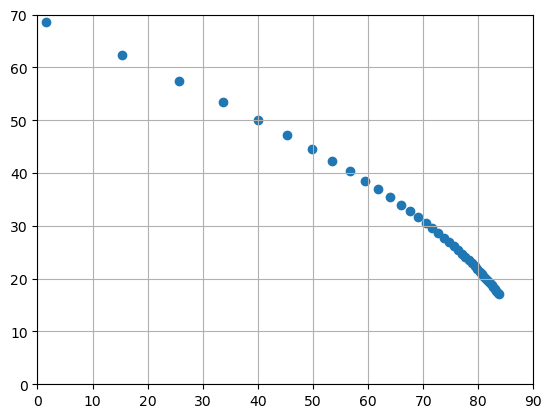

In [204]:
plt.scatter(lat, time)
plt.xlim(0,90)
plt.ylim(0,70)
plt.grid()

In [199]:
14000/60.0

233.33333333333334

In [200]:
np.rad2deg(np.arcsin(0.0300))

1.719131320877811